<a href="https://colab.research.google.com/github/fariba87/Feature-Map-Visualization/blob/main/featuremapvisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Feature Map visualization can be used for internal representation.

lower layer try to learn more general features( they are nore interpretable)

higher layer try to learn task specific features(complex features) that are not interpretable by human

Filter(kernels) at lower layer try to find more general features, they are like gabor filters to detect edge/color/...

Filter(kernels) at higher layer are trying to find task specific featurs.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/Colab\ Notebooks

/content/gdrive/MyDrive/Colab Notebooks


In [ ]:
# VGG uses 3*3 kernels in all layers


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

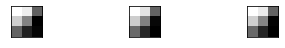

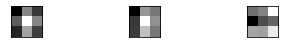

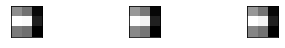

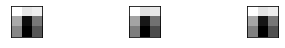

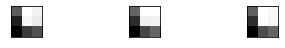

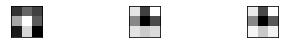

block1_conv2 (3, 3, 64, 64)


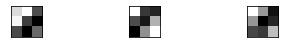

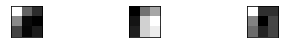

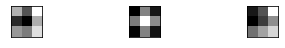

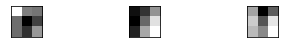

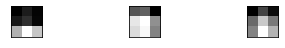

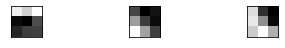

block2_conv1 (3, 3, 64, 128)


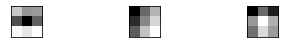

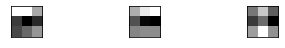

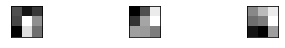

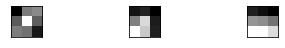

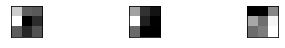

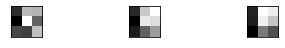

block2_conv2 (3, 3, 128, 128)


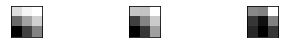

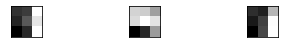

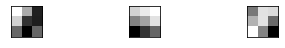

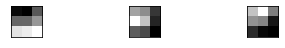

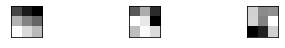

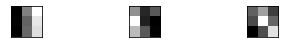

block3_conv1 (3, 3, 128, 256)


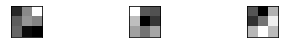

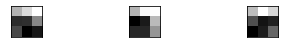

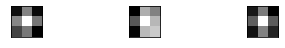

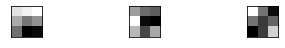

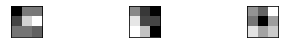

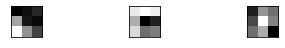

block3_conv2 (3, 3, 256, 256)


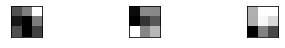

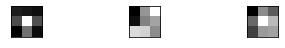

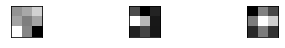

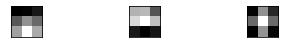

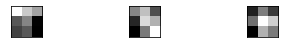

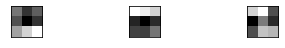

block3_conv3 (3, 3, 256, 256)


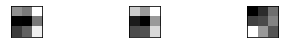

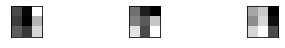

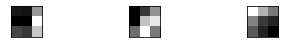

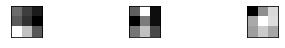

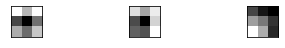

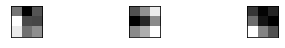

block4_conv1 (3, 3, 256, 512)


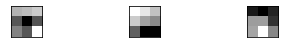

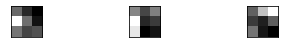

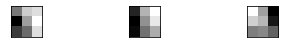

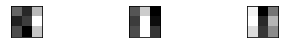

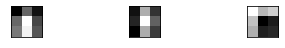

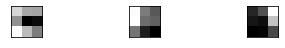

block4_conv2 (3, 3, 512, 512)


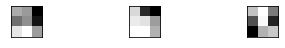

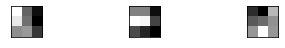

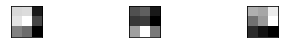

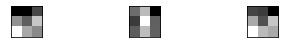

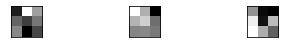

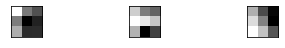

block4_conv3 (3, 3, 512, 512)


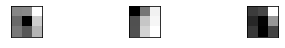

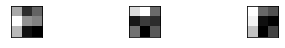

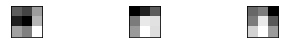

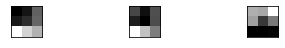

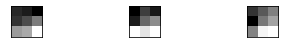

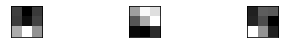

block5_conv1 (3, 3, 512, 512)


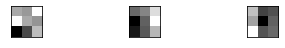

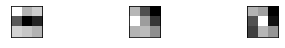

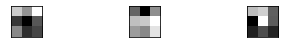

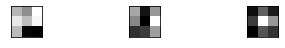

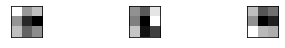

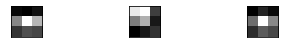

block5_conv2 (3, 3, 512, 512)


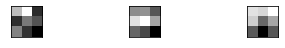

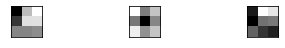

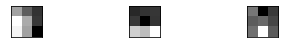

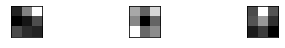

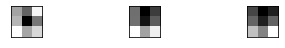

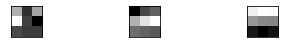

block5_conv3 (3, 3, 512, 512)


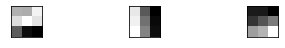

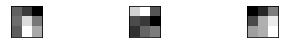

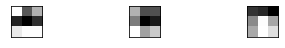

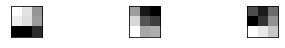

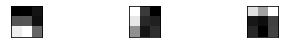

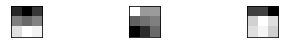

In [ ]:

# load vgg model
import tensorflow as tf
from tensorflow import keras
#from tf.keras.applications.vgg16 import VGG16
# load the model
model = tf.keras.applications.vgg16.VGG16()
# summarize the model
model.summary()
# summarize filter shapes
for layer in model.layers:
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
# get filter weights
    filters, biases = layer.get_weights()
    print(layer.name, filters.shape)

    # retrieve weights from the second hidden layer
    #filters, biases = model.layers[1].get_weights()
    # normalize filter values to 0-1 so we can visualize them
    f_min, f_max = filters.min(), filters.max()
    filters = (filters - f_min) / (f_max - f_min)
    # plot first few filters
    n_filters, ix = 6, 1
    for i in range(n_filters):
      # get the filter
      f = filters[:, :, :, i]
      # plot each channel separately
      for j in range(3):
        # specify subplot and turn of axis
        ax = pyplot.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        pyplot.imshow(f[:, :, j], cmap='gray')
        ix += 1
        # show the figure
      pyplot.show()


1/1 [==============================] - 2s 2s/step
23
(1, 224, 224, 3)


<ipython-input-49-bf58e4d5e199>:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  square = np.int(np.sqrt(channels))


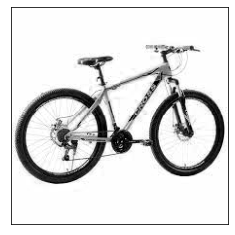

(1, 224, 224, 64)


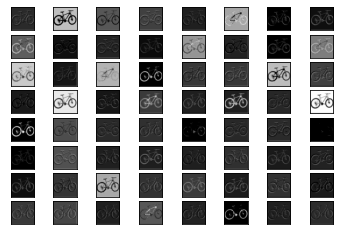

(1, 224, 224, 64)


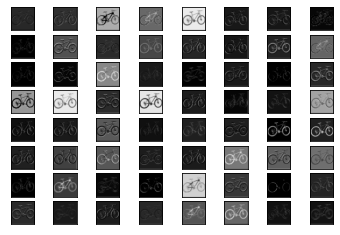

(1, 112, 112, 64)


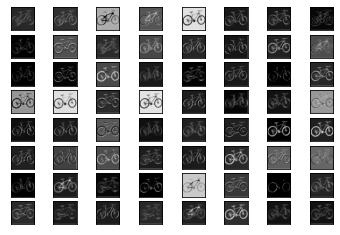

(1, 112, 112, 128)


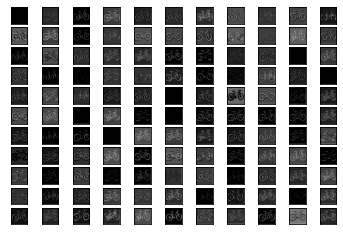

(1, 112, 112, 128)


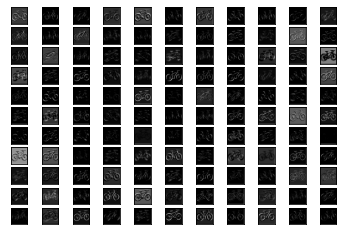

(1, 56, 56, 128)


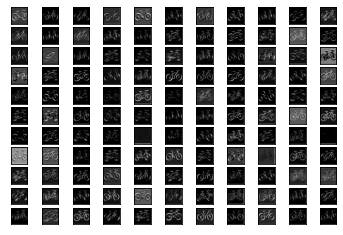

(1, 56, 56, 256)


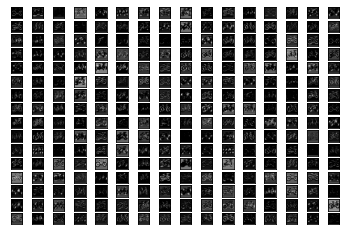

(1, 56, 56, 256)


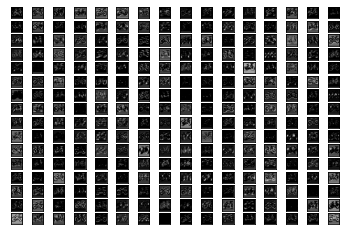

(1, 56, 56, 256)


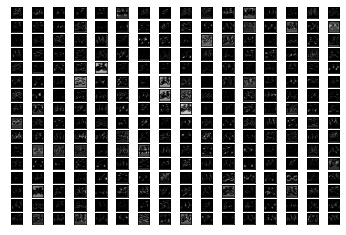

(1, 28, 28, 256)


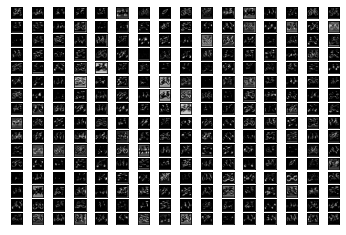

(1, 28, 28, 512)


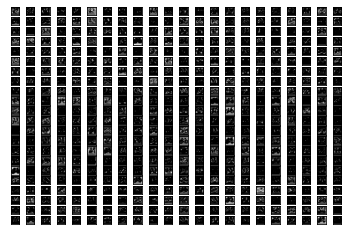

(1, 28, 28, 512)


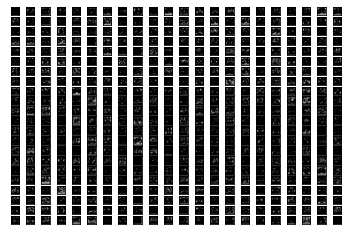

(1, 28, 28, 512)


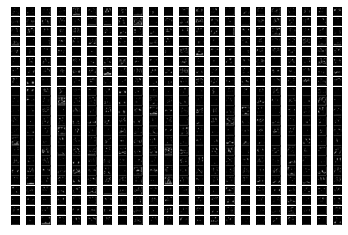

(1, 14, 14, 512)


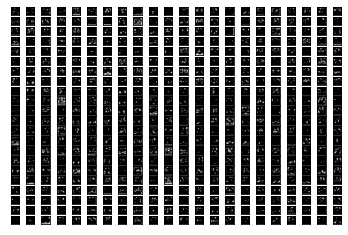

(1, 14, 14, 512)


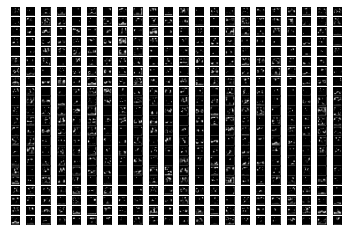

(1, 14, 14, 512)


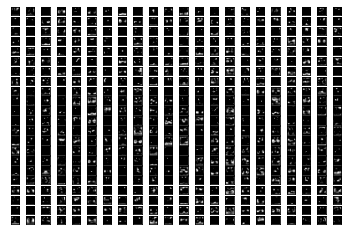

(1, 14, 14, 512)


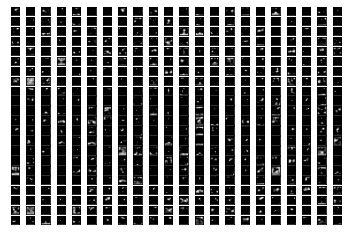

(1, 7, 7, 512)


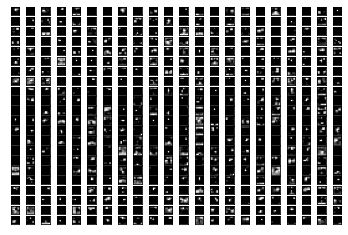

(1, 25088)
(1, 4096)
(1, 4096)
(1, 1000)


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.preprocessing.image import load_img, img_to_array
model = VGG16()
layers_outputs =[layer.output for layer in model.layers]
visualize_model = tensorflow.keras.models.Model(inputs=model.input, outputs=layers_outputs)
img = load_img('bicycle.jpg', target_size=(224,224))
x= img_to_array(img)
x=x.reshape((1,224,224,3))
x = x/255.
feature_maps =visualize_model.predict(x)
print(len(feature_maps))
layers_names=[layer.name for layer in model.layers]
from matplotlib import pyplot
for layer_names, feature_map in zip(layers_names, feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape)==4:
    channels=feature_map.shape[-1]
    size=feature_map.shape[1]
    square = np.int(np.sqrt(channels))
    ix = 1
    for _ in range(square):
      for _ in range(square):
    # specify subplot and turn of axis
        ax = pyplot.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        pyplot.imshow(feature_map[0, :, :, ix-1], cmap='gray')
        ix += 1
# show the figure
  pyplot.show()
    # display_grid= np.zeros((size,size*channels))
    # for i in range(channels):
    #   x= feature_map[0,:,:,i]
    #   x-=x.mean()
    #   x/=x.std()
    #   x*=64
    #   x+=128
    #   x=np.clip(x,0,255).astype('uint8')
    #   display_grid[:,i*size:(i+1)*size]=x
    # scale = 20./channels
    # plt.figure(figsize=(scale*channels,scale))
    # plt.title(layer_names)
    # plt.grid(False)
    # plt.imshow(display_grid, aspect ='auto', cmap='viridis')




